In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# impostazione per vedere tutte le colonne di un DataFrame
pd.set_option('display.max_columns',None)

# 1. CAPIRE BENE IL PROBLEMA

### 1.1 IMPORT DEI DATI

I dati sono nella cartella in formato .csv. Normalmente il dataset NON è già diviso in train set e test set, come invece in questo caso viene fornito da Kaggle (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

NB! All'inizio di ogni analisi di ML la prima cosa da fare è separare una parte del dataset da tenere come 'test set' finale, sul quale non verrà fatta alcuna operazione di training. Questo è necessario per testare le capacità previsionali del modello su un set 'sconosciuto' al modello stesso, in modo anche da rivelare eventuali problemi di overfitting.

In [3]:
# facciamo le nostre analisi sul training set
train_df = pd.read_csv('housing.csv') 

In [6]:
# prime 5 righe del DataFrame
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# info sulla composizione del DataFrame
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Nel dataset si notano tre tipi di dati: 'int64', 'float64' e 'object'. Tipicamente gli 'object' sono variabili categoriche, mentre 'int' e 'float' sono variabili numeriche.

In [8]:
train_df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

### 1.2 VALUTAZIONE SOGGETTIVA: COSA MI ASPETTO?

Le valutazioni 'a occhio' sono uno step fondamentale per ogni analisi di Machine Learning. Servono a prendere confidenza con i dati e fare una prima individuazione di quelle che potrebbero essere le variabili più importanti per il nostro attuale problema. 

La descrizione del significato di ogni colonna del dataset (fornita da Kaggle) è nel file data_description.txt. Ho creato però un file excel di supporto (housing_qualitative.xlsx), per impostare una prima valutazione soggettiva e qualitativa della variabili in gioco.

Aprite il file excel e provate a ipotizzare quali variabili potrebbero essere le più influenti sulla determinazione del prezzo di una casa. Per ogni variabile inserite nella colonna 'IMPORTANZA' un voto scelto da voi tra 'bassa', 'media', 'alta'.

Domande che potreste farvi sono per esempio:
- tengo in considerazione questa variabile quando devo comprare (o affittare) un casa?
- l'informazione contenuta in questa variabile è già contenuta in altre?
- ...

# 2. ESPLORAZIONE DELLE VARIABILI PRINCIPALI

### 2.1 ESPLORAZIONE DELLA VARIABILE TARGET

La prima cosa da esplorare è certamente la cosiddetta variabile 'target' della nostra previsione. In questo caso vogliamo prevedere il prezzo di una casa sulla base di altri dati contestuali, quindi la nostra variabile target sarà 'SalePrice'.

NB. In questo notebook uso principalmente la libreria 'seaborn' per i plot (https://seaborn.pydata.org), che è un'ottima libreria per fare analisi grafica dei dati. 
Nonostante tutti i grafici si possano riprodurre anche con la più comune libreria 'matplotlib', seaborn è di fatto meglio integrata con i DataFrame pandas, e permette di creare velocemente grafici utili e anche esteticamente più belli!

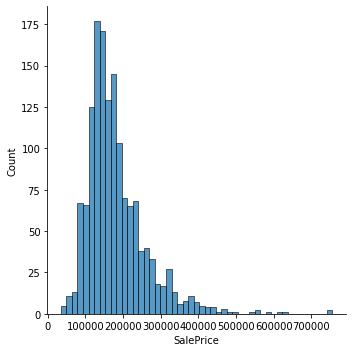

In [12]:
import seaborn as sns
sns.displot(data=train_df['SalePrice']);

Il picco della distribuzione è tra i 100.000 e i 200.000. Si nota bene che la distribuzione ha una coda pronunciata verso destra (skewness positiva), cioè verso i prezzi più alti. Inoltre sembra avere un picco piuttosto pronunciato rispetto a una distribuzione normale (kurtosis positiva). 

In particolare:

In [ ]:
#skewness = 0 distribuzione gaussiana. una distibuzione come la nostra ha skewness positiva.

In [ ]:
# descrizione statistica del DataFrame
train_df['SalePrice'].describe()        #std -> deviazione standard

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
print('Skewness:', train_df['SalePrice'].skew())
print('Kurtosis:', train_df['SalePrice'].kurt())

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


N.B. i valori specifici di skewness e kurtosis possono servire ma non sono sempre indispensabili, qui stiamo cercando più che altro di farci un'idea di come sono distribuiti i prezzi delle case

### 2.2 VARIABILE TARGET vs ALTRE VARIABILI SCELTE

Possiamo ora analizzare le relazioni della variabile target con altre variabili. Per cominciare possiamo usare quelle che abbiamo individuato come molto importanti 'a occhio' sul foglio excel. 
Prendiamo per esempio: 
- OverallQual
- OverallCond
- YearBuilt
- TotalBsmtSF
- GrLivArea
- YearRemodAdd

Di queste variabili solo TotalBsmtSF e GrLivArea sono variabili numeriche. Le altre sono variabili categoriche (ebbene sì, anche gli anni sono da considerare come variabili categoriche!). Quindi vanno analizzate con strumenti diversi.

In [14]:
#per vedere il type delle variabili:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### 2.2.1 Relazioni con variabili numeriche

In [ ]:
#scatterplot mi fa vedere una variabile con un'altra

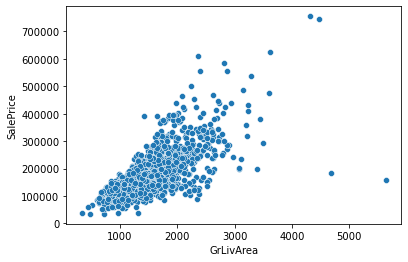

In [ ]:
### SalePrice VS GrLivArea
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df);

In [ ]:
#ottima relazione tra queste due variabili perchè al variare di una varia anche l'altra. relazione positiva, proporzionale diretta.

La relazione del prezzo di vendita con il valore dell'area del piano sopra-terra è evidente. Il tipo di relazione sembra essere lineare, o debolmente esponenziale.

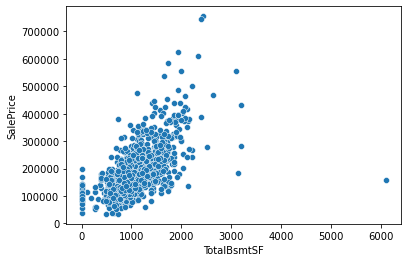

In [ ]:
### SalePrice VS TotalBsmtSF
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_df);

Anche l'area del piano interrato è evidentemente correlata con SalePrice. Però quella casa con un (mostruso) piano interrto di più di 6000 square feet mi schiaccia tutto il grafico a sinistra, quindi per vederla meglio mi conviene toglierlo usando .set_xlim():

In [ ]:
#possiamo togliere l'elemento più a destra che sballa tutto il grafico e mettere un limite (a 3500)

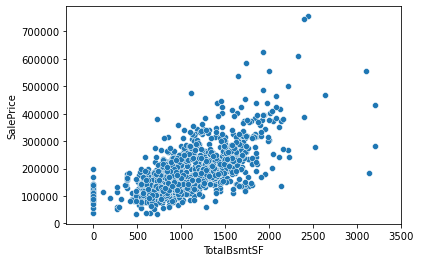

In [ ]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_df).set_xlim(right=3500);

N.B. Se vogliamo vedere come appare una relazione poco significativa prendiamo per esempio BsmtUnfSF (area del piano interrato non rifinito). Al variare dell'area non corrisponde un aumento ben visibile dei prezzi di vendita:

In [ ]:
#la linea verticale a sx è costituita da case che non hanno il basement, ma hanno un prezzo.

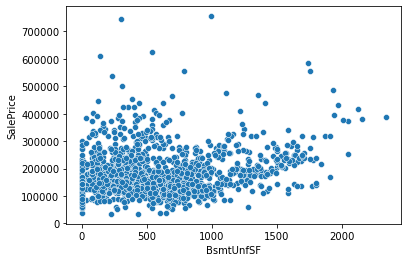

In [ ]:
### SalePrice VS TotalBsmtSF
plot = sns.scatterplot(x='BsmtUnfSF', y='SalePrice', data=train_df);

In [ ]:
#non c'è una buona relazione

#### 2.2.2 Relazioni con variabili categoriche

Per esaminare la relazione di SalePrice con variabili categoriche non possiamo stabilire una semplice relazione numerica come abbiamo fatto finora. C'è bisogno di plottare la distribuzione dei prezzi per ogni possibile categoria, e poi metterle in paragone tra loro.

Prendiamo per esempio la variabile 'Neighborhood' (quartiere). Mi aspetto che a Northridge Heights (NridgHt), che è un quartiere particolamente facoltoso, la distribuzione dei prezzi sarà centrata su valori piuttosto alti:

In [ ]:
#come variano le distribuzione dei prezzi per ogni quartiere

In [ ]:
#prima selezionare i dati dove il quartiere è NridHt

In [21]:
cond = train_df['Neighborhood']=='NridgHt'     #mi restituisce solo i dati dove è vero
train_df[cond]['SalePrice']

11      345000
20      325300
25      256300
27      306000
34      277500
         ...  
1289    281000
1305    325000
1306    202500
1359    315000
1437    394617
Name: SalePrice, Length: 77, dtype: int64

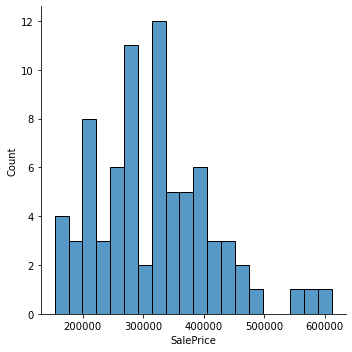

In [ ]:
data = train_df[train_df['Neighborhood']=='NridgHt']['SalePrice']
sns.displot(data, bins=20);

Mentre a 'College Creek' probabilmente il prezzo oscillerà attorno a valori più bassi:

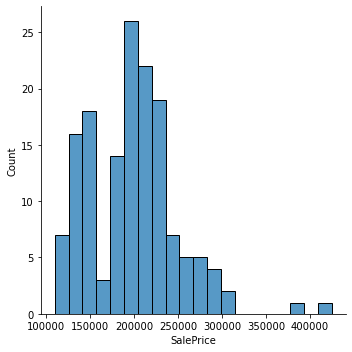

In [ ]:
data = train_df[train_df['Neighborhood']=='CollgCr']['SalePrice']
sns.displot(data, bins=20);

Seaborn mette a disposizione la funzione 'boxplot', che oermette di plottare direttamente le distribuzioni di ogni categoria in un singolo plot. Per la variabile 'Neighborhood':

In [ ]:
#faccio prima su matplotlib e poi il plot lo faccio con sns

In [ ]:
# la linea in mezzo è la media, la stanghetta più in alto è il valore massimo, la stanghetta più in basso è il valore minimo
#la skwenes è l'area all'interno della bloxplot: se quella al di sotto della media è maggiore è negativa.

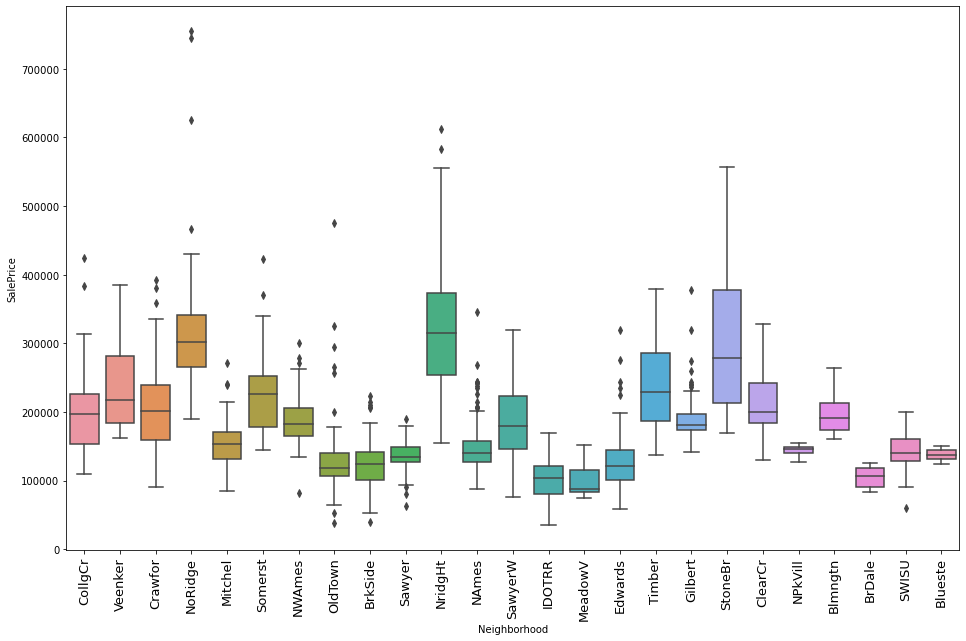

In [ ]:
### Neighborhood VS SalePrice

plt.figure(figsize=(16,10))
sns.boxplot(x='Neighborhood', y="SalePrice", data=train_df)
plt.xticks(rotation=90, fontsize=13); # ruota le etichette sull'asse x

Neighborhood sembra in effetti essere una variabile di una certa importanza nel determinare il prezzo di vendita, anche se ovviamente non può essere presa da sola per fare una previsione.

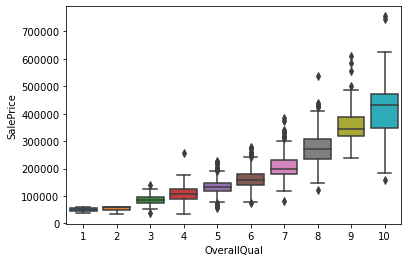

In [ ]:
### OverallQual VS SalePrice

sns.boxplot(x='OverallQual', y="SalePrice", data=train_df);

In [ ]:
#la qualità è un'ottima variabile di previsione. quasi più che lineare.

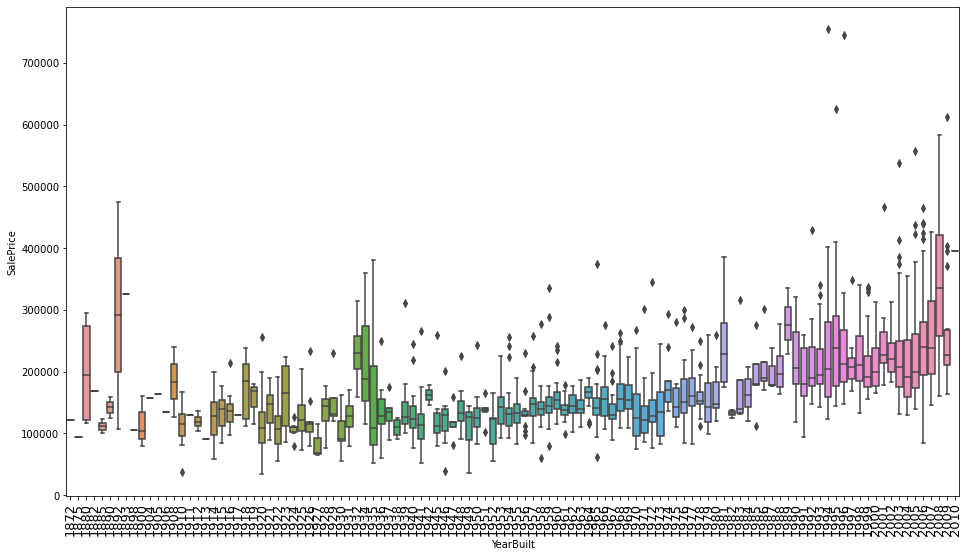

In [ ]:
### YearBuilt VS SalePrice

plt.figure(figsize=(16,9))
sns.boxplot(x='YearBuilt', y="SalePrice", data=train_df)
plt.xticks(rotation=90, fontsize=13);

Possiamo dire che sembra esserci una correlazione tra l'anno in cui è stata costruita la casa e il prezzo di vendita, con un andamento crescente generalmente costante negli anni.

In [ ]:
#anno di costruzione. prezzo di oggi. 

# 3. CORRELAZIONI INTERO DATASET

In [ ]:
#esplorazione delle correlazioni. I parametri statistici, es.la correlazione di Pearson -> coeff di correlaz lineare

Finora abbia costruito un'analisi soggettiva, che è molto utile per iniziare a prendere dimestichezza con i dati, però abbiamo tenuto fuori molte altre variabili che potrebbero risultare più importanti di quanto possano sembrare a prima vista.

Occorre un'analisi più oggettiva e strutturata sulll'intero dataset. Gli strumenti che useremo qui sono:
- una matrice delle correlazioni fra tutte le variabili (visualizzata con sns.heatmap())
- uno zoom sulle le 10 variabili più correlate con SalePrice (visualizzata prima con sns.heatmap(), poi con sns.pairplot()

In [ ]:
#.corr -> fa il print di ogni feature con ogni feature. Qui dentro ci sono tutte le correlazioni tra una variabile e l'altra.

In [27]:
# Matrice di correlazione
train_df.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [28]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

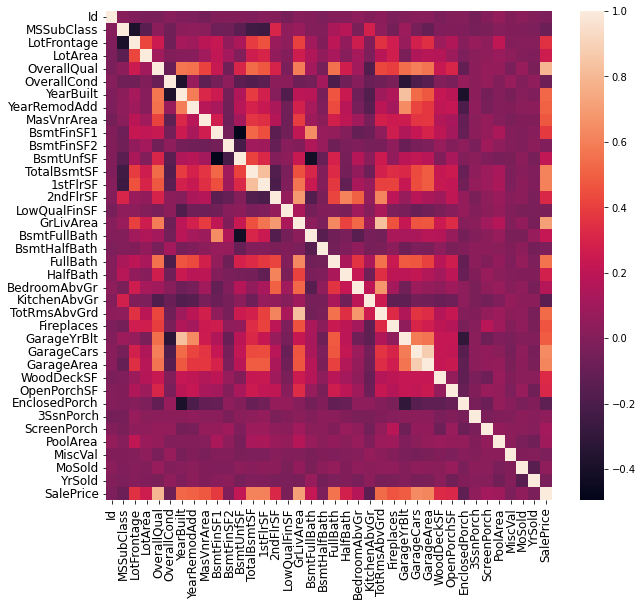

In [22]:
#plotting della matrice di sopra.

# visualizzata con sns.heatmap
corr_matrix = train_df.corr()    #matrice di correlazione

plt.figure(figsize=(10,9))
sns.heatmap(corr_matrix)     
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
#quadratino bianco -> caso di collinearità. Ne scelgo solo una delle due variabili.

Ora vediamo le correlazioni con SalePrice

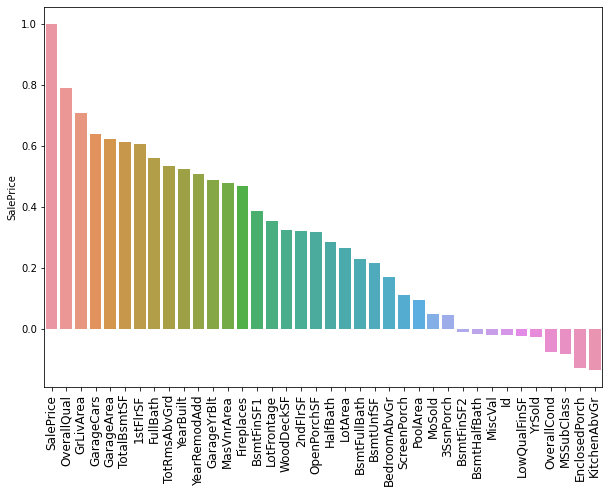

In [ ]:
sale_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=sale_corr.index, y=sale_corr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

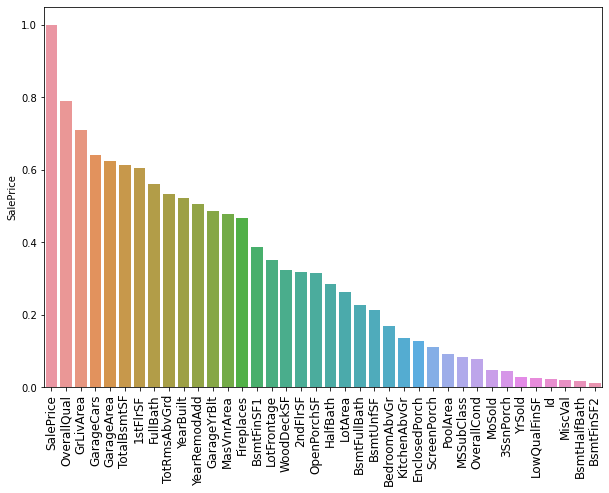

In [26]:
sale_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=sale_corr.index, y=sale_corr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [29]:
sale_corr      #ho creato la correlazione prima, e ora basta solo richiamare la serie.

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

In [ ]:
#loc e iloc!!
#Per accedere all'indice tipicamente si usano questi attributi 
# .loc[] ->location. mi permette di accedere all'indice; .iloc -> integer location da 0 a es.[0:10]

In [30]:
sale_corr.iloc[1:11]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [ ]:
#Per estrapolare i nomi delle più correlate basta che io acceda agli indici .index -> mi dà i nomi delle più correlate.

In [32]:
sale_corr.iloc[1:11].index

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

In [ ]:
#ho preso l'index perchè mi serve per metterlo nella visualizzazione che ho qui sotto. most_corr -> mi dà le più correlate.

In [ ]:
#è possibile solo con variabili NUMERICHE!

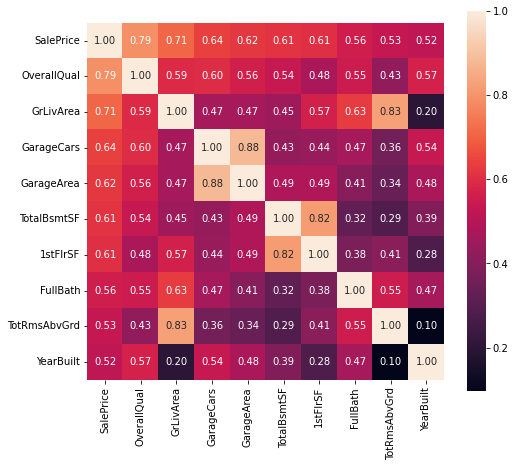

In [33]:
# Seleziono le prime variabili più correlate con Saleprice per darci un occhio da più vicino 
# NB. ovviamente non mi interessa che siano correlate positivamente o negativamente, ma in valore assoluto, per questo uso .abs())
most_corr_vars = sale_corr.abs().iloc[0:10].index
most_corr_matrix = train_df[most_corr_vars].corr()

plt.figure(figsize=(8,7))
hm = sns.heatmap(most_corr_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

Volendo Seaborn mette a disposizione la funzione pairplot() per visualizzare gli scatterplot incrociati e le distribuzioni delle variabili...

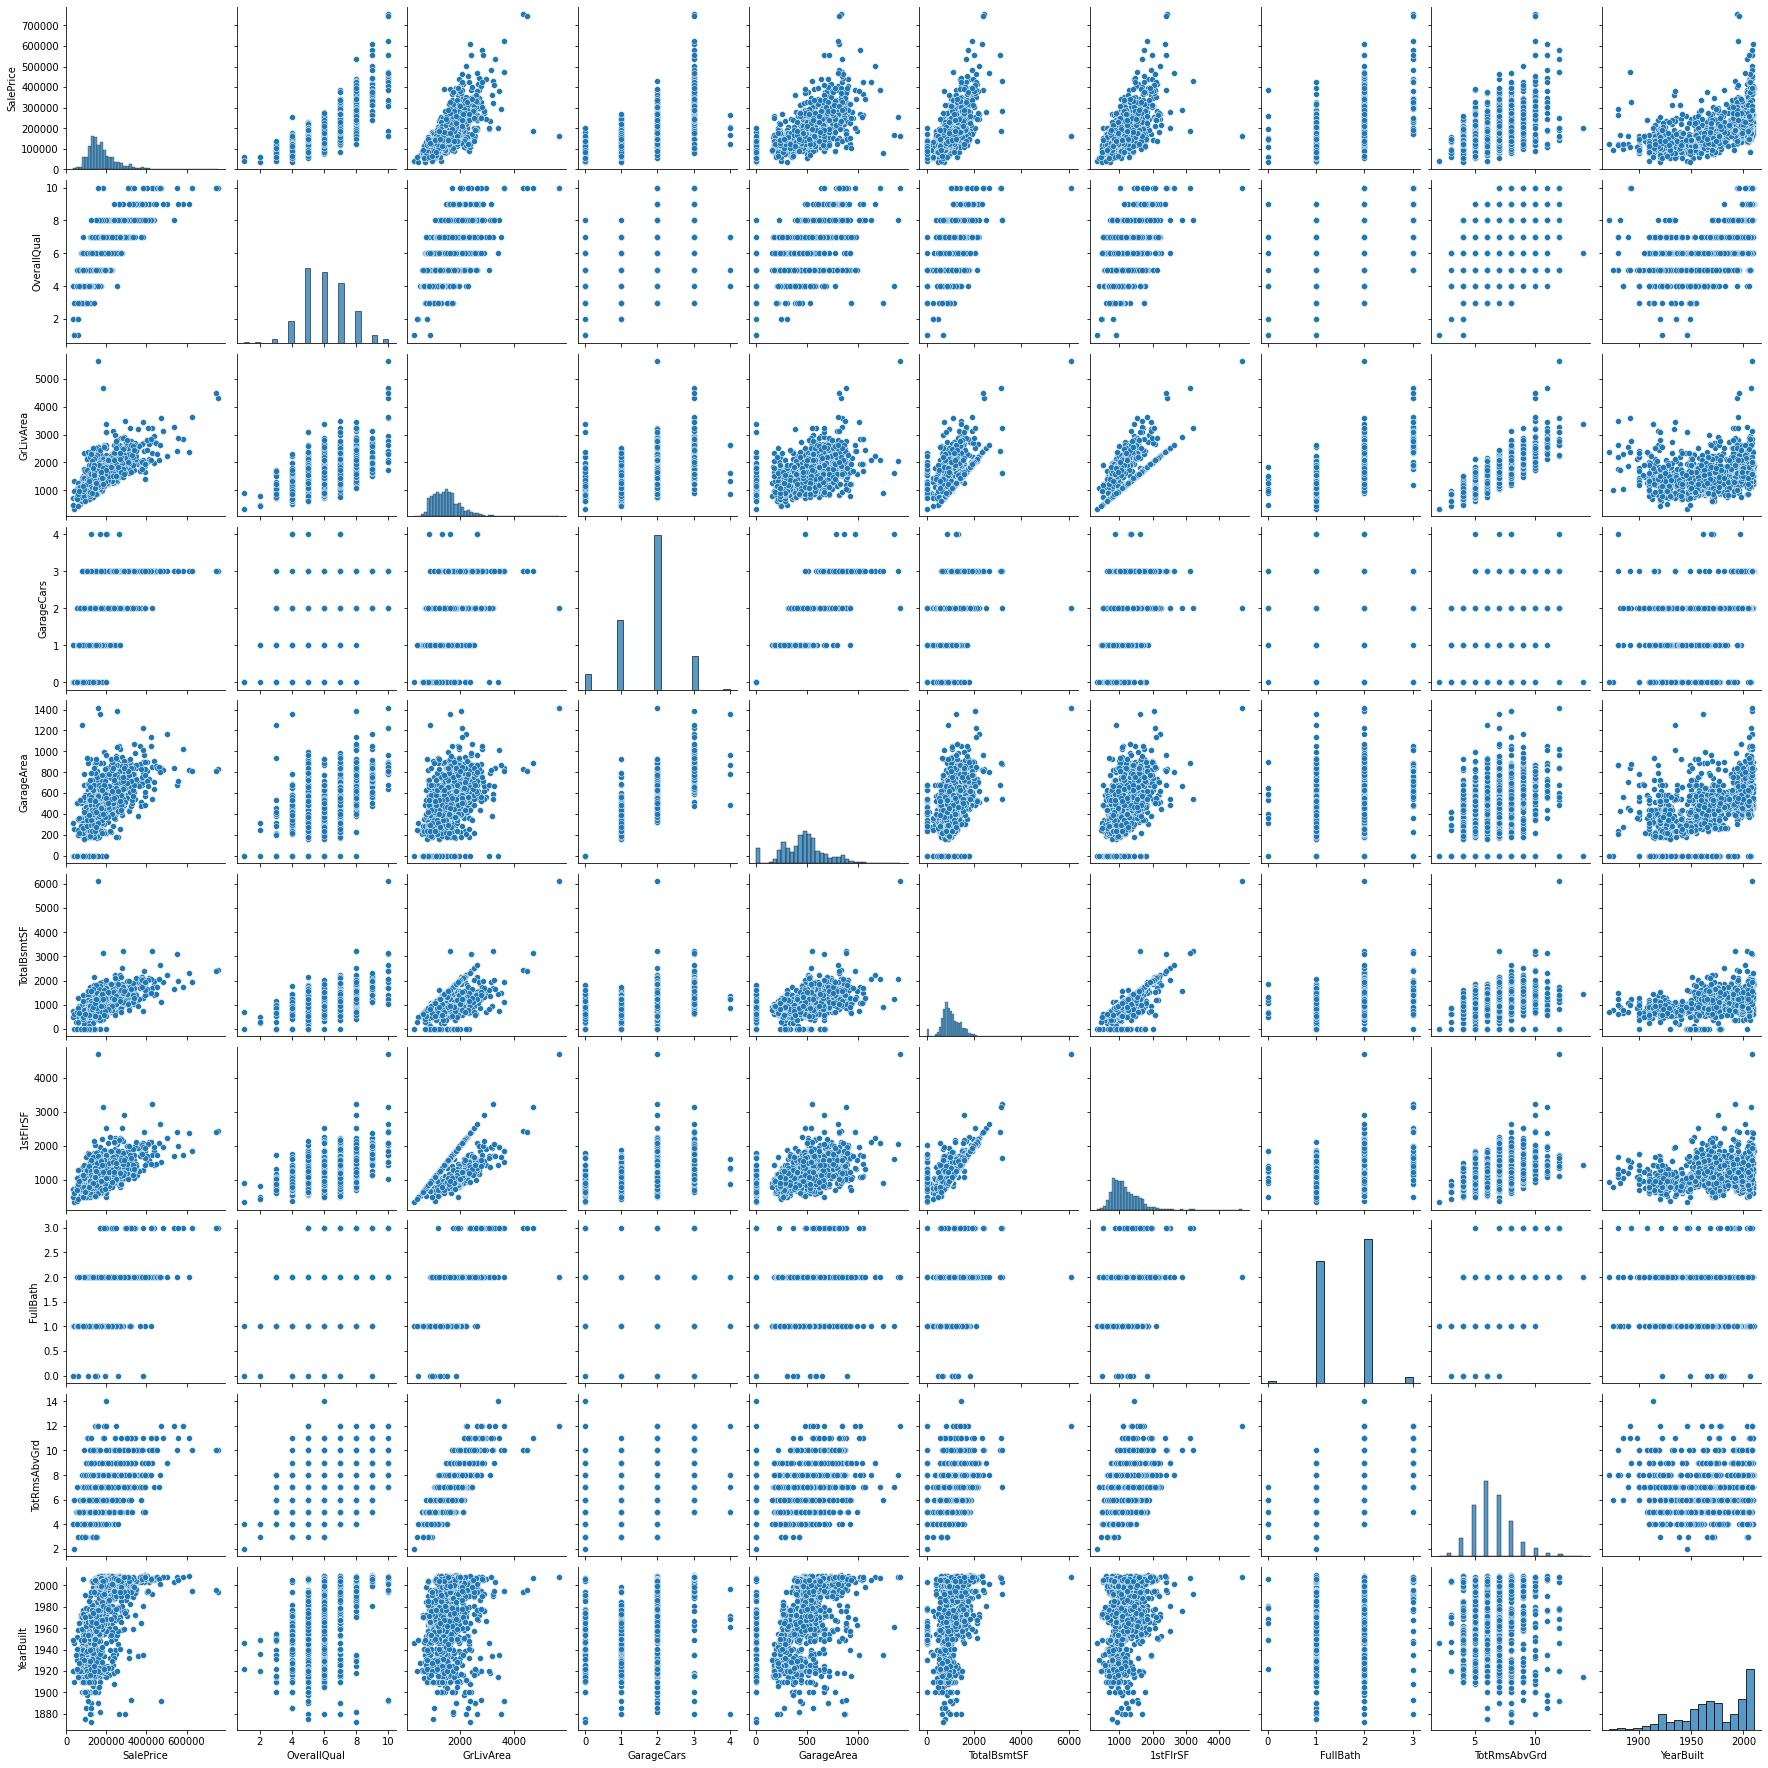

In [34]:
sns.pairplot(data=train_df[most_corr_vars]);